## Create 1000 version of the ring graphs
- the base ring graph consists of 3 figures (bell, star and tree) which are each repeated 10 times and added to a ring at every 5 modes.
- The base is sampled for 10 values of fraction changes and 10 values of delta values. For every value 10 graphs are created with a different seed.

In [1]:
from graphcase_experiments.tools.graph_sampler import create_sampled_ring_graphs
create_sampled_ring_graphs()

## execute a grid search for the graphcase algo
the hypertuning for the graphcase algo is done once using the graph with fraction = 0.6 and delta=0.6


/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-04-30 09:16:43.852455: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


grid search took 468.7 seconds to run, 23.43630678653717 per run


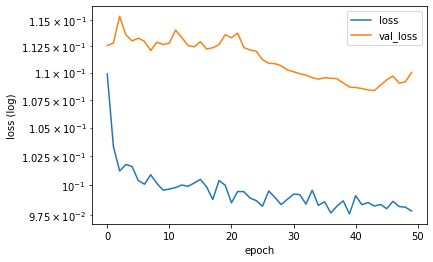

2022-04-30 09:25:02.131560: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


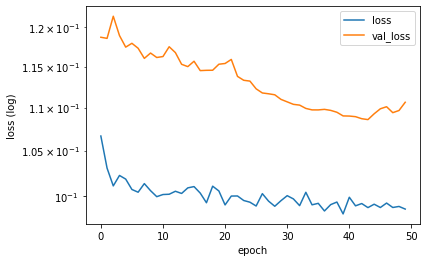

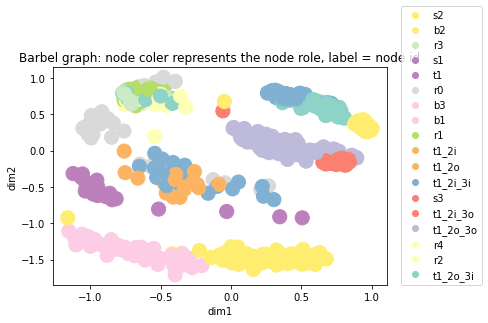

result on clustering 0.8281100403174239, result on classification0.8889910447536695/n
best params:/n
{'batch_size': 30, 'hub0_feature_with_neighb_dim': 128, 'verbose': False, 'seed': 1, 'encoder_labels': ['attr1', 'attr2'], 'learning_rate': 0.0003668872396300966, 'act': <function sigmoid at 0x7fb1a14f4dc0>, 'useBN': True, 'dropout': 0.09859650451427784, 'support_size': [7, 7], 'dims': [3, 128, 128, 128]}


In [1]:
import networkx as nx
from graphcase_experiments.experiments.ring_exp import ring_exp

G = nx.read_gpickle('graphcase_experiments/graphs/sampled_ring_graphs/fraction0.6_delta0.6_seed10.pickle')
embed, G, tbl, res, params = ring_exp(execute_grid_search=True, G=G)

print(f"result on clustering {res['clustering']['ami']}, result on classification{res['classification']['f1_macro']}/n")
print("best params:/n")
print(params)

## execute GraphCASE over all ring graphs
given the best params returns from the gridsearch, we apply graphcase to the 1000 variant of the ring graph

2022-04-30 14:06:27.953359: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-04-30 14:07:27.300019: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


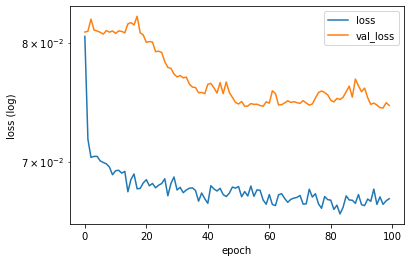

KeyError: '0.5'

In [2]:
from graphcase_experiments.experiments.ring_exp import ring_exp_all
import tensorflow as tf
params = {
    'batch_size': 30,
    'hub0_feature_with_neighb_dim': 128,
    'verbose': False,
    'seed': 1,
    'encoder_labels': ['attr1', 'attr2'],
    'learning_rate': 0.0003668872396300966,
    'act': tf.nn.sigmoid,
    'useBN': True,
    'dropout': 0.09859650451427784,
    'support_size': [7, 7],
    'dims': [3, 128, 128, 128],
}

res = ring_exp_all(params)


In [2]:
res

{}